In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import re    #for regex
import string
from tensorflow import keras
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
train = pd.read_csv('G:/toxic_final.csv')

In [90]:
train

,Unnamed: 0,Unnamed: 0.1,comment_text,Toxic
0,0,61,discussion requires both parties to explain th...,0
1,1,40630,avoiding edit wars acroterion i have been tr...,0
2,2,12124,omg i have never thought of it that way pure g...,0
3,3,11380,because of our recent edits to skycable the us...,0
4,4,5844,no harm done i deleted the second comment,0
...,...,...,...,...
41034,41034,43459,new mutants putlocker about to be the google ...,1
41035,41035,43460,it was better than the new mutants there were ...,1
41036,41036,43461,whenever i think that I am truly fast furious...,1
41037,41037,43462,my man was not to happy i left on this harley ...,1


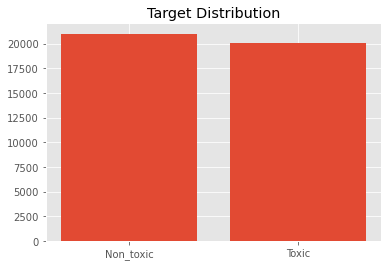

In [91]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [92]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) #transfomer to str 

In [166]:
x=train["comment_text"]
y=train["Toxic"]

In [167]:
#Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=3,shuffle=True)

In [168]:
max_feature = 3000#max feature 3000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")#tokenizer 

tokenizer.fit_on_texts(train_x)

In [169]:
sequences = tokenizer.texts_to_sequences(train_x)

In [170]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [171]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [172]:
pad_sequences

array([[   0,    0,    0, ...,   45,  114,   12],
       [   0,    0,    0, ...,    7,  892,  134],
       [   0,    0,    0, ...,   20,   75,  153],
       ...,
       [   0,    0,    0, ...,  420,  139,  408],
       [   0,    0,    0, ...,  596,   34, 1156],
       [   0,    0,    0, ...,  407,  497,    1]])

In [175]:
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_lstm.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
dropout_39 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 225,089
Trainable params: 225,089
Non-trainable params: 0
_________________________________________________________________


In [176]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=2, mode='auto', restore_best_weights=True)


In [177]:
model_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [178]:
history = model_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 18s 34ms/step - loss: 0.3126 - accuracy: 0.8661 - val_loss: 0.2218 - val_accuracy: 0.9120
Epoch 2/20
462/462 [==============================] - 15s 33ms/step - loss: 0.2045 - accuracy: 0.9186 - val_loss: 0.2078 - val_accuracy: 0.9166
Epoch 3/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1833 - accuracy: 0.9275 - val_loss: 0.2617 - val_accuracy: 0.9056
Epoch 4/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1679 - accuracy: 0.9337 - val_loss: 0.2223 - val_accuracy: 0.9117
Epoch 5/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1522 - accuracy: 0.9387 - val_loss: 0.2343 - val_accuracy: 0.9129
Epoch 6/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1340 - accuracy: 0.9450 - val_loss: 0.2479 - val_accuracy: 0.9096
Epoch 7/20
462/462 [==============================] - 15s 33ms/step - loss: 0.1224 - accuracy: 0.9502 - val_loss: 0.2577 - val_accuracy:

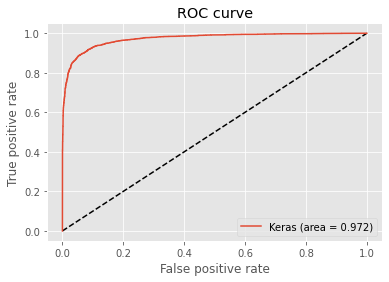

In [179]:
from sklearn.metrics import roc_curve
y_pred=model_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.60651386
              precision    recall  f1-score   support

           0     0.8962    0.9456    0.9202      4154
           1     0.9409    0.8878    0.9136      4054

    accuracy                         0.9170      8208
   macro avg     0.9186    0.9167    0.9169      8208
weighted avg     0.9183    0.9170    0.9169      8208



In [181]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

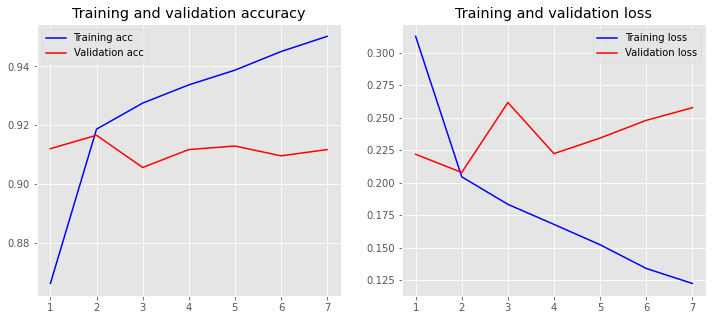

In [182]:
plot_history(history)

In [183]:
model_stack_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 500),
                                tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64,return_sequences = True),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.LSTM(64),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_stack_lstm .summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
dropout_41 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 500, 64)           33024     
_________________________________________________________________
dropout_42 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 258,113
Trainable params: 258,113
Non-trainable params: 0
_______________________________________________

In [184]:
model_stack_lstm.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(3e-3),
                 metrics= ["accuracy"])

In [185]:
history = model_stack_lstm.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 33s 65ms/step - loss: 0.3028 - accuracy: 0.8712 - val_loss: 0.2176 - val_accuracy: 0.9184
Epoch 2/20
462/462 [==============================] - 29s 62ms/step - loss: 0.2037 - accuracy: 0.9195 - val_loss: 0.2180 - val_accuracy: 0.9169
Epoch 3/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1813 - accuracy: 0.9264 - val_loss: 0.2167 - val_accuracy: 0.9172
Epoch 4/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1600 - accuracy: 0.9354 - val_loss: 0.2316 - val_accuracy: 0.9102
Epoch 5/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1474 - accuracy: 0.9410 - val_loss: 0.2245 - val_accuracy: 0.9153
Epoch 6/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1296 - accuracy: 0.9492 - val_loss: 0.2633 - val_accuracy: 0.9062
Epoch 7/20
462/462 [==============================] - 29s 62ms/step - loss: 0.1228 - accuracy: 0.9508 - val_loss: 0.2653 - val_accuracy:

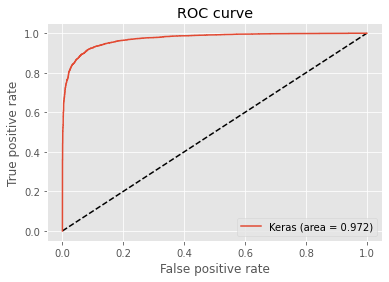

In [186]:
from sklearn.metrics import roc_curve
y_pred=model_stack_lstm.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [187]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.41371542
              precision    recall  f1-score   support

           0     0.9175    0.9179    0.9177      4154
           1     0.9158    0.9154    0.9156      4054

    accuracy                         0.9167      8208
   macro avg     0.9167    0.9167    0.9167      8208
weighted avg     0.9167    0.9167    0.9167      8208



In [188]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(max_feature,64,input_length = 500))
bi_model.add(Bidirectional(LSTM(64,return_sequences=True)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(LSTM(64))) #lstm with 100 neurons
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 500, 64)           192000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 500, 128)          66048     
_________________________________________________________________
dropout_43 (Dropout)         (None, 500, 128)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 356,993
Trainable params: 356,993
Non-trainable params: 0
_________________________________________________________________
None


In [189]:
history = bi_model.fit(
    pad_sequences,train_y,
    batch_size= 64,
    epochs= 20,
    validation_split= 0.1,
    verbose=1,callbacks=[callback]
)

Epoch 1/20
462/462 [==============================] - 67s 129ms/step - loss: 0.2908 - accuracy: 0.8769 - val_loss: 0.2060 - val_accuracy: 0.9193
Epoch 2/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1962 - accuracy: 0.9222 - val_loss: 0.2334 - val_accuracy: 0.9117
Epoch 3/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1744 - accuracy: 0.9306 - val_loss: 0.2214 - val_accuracy: 0.9150
Epoch 4/20
462/462 [==============================] - 57s 124ms/step - loss: 0.1530 - accuracy: 0.9384 - val_loss: 0.2271 - val_accuracy: 0.9090
Epoch 5/20
462/462 [==============================] - 58s 125ms/step - loss: 0.1319 - accuracy: 0.9474 - val_loss: 0.2473 - val_accuracy: 0.9102
Epoch 6/20
462/462 [==============================] - 58s 125ms/step - loss: 0.1187 - accuracy: 0.9543 - val_loss: 0.2505 - val_accuracy: 0.9080
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


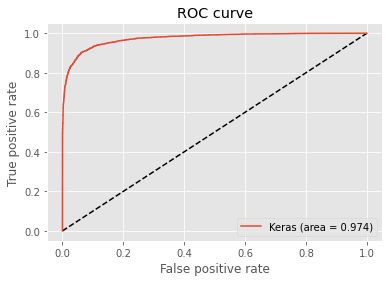

In [190]:
from sklearn.metrics import roc_curve
y_pred=bi_model.predict(x_testing)
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [191]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
y=tpr-fpr
idx=np.argmax(y)#Youden_index
best_threshold=thresholds[idx]
print("The best threshold is",best_threshold)
print(classification_report(test_y, y_pred >best_threshold ,digits=4))

The best threshold is 0.52273405
              precision    recall  f1-score   support

           0     0.9079    0.9377    0.9225      4154
           1     0.9339    0.9026    0.9180      4054

    accuracy                         0.9203      8208
   macro avg     0.9209    0.9201    0.9203      8208
weighted avg     0.9208    0.9203    0.9203      8208

